In [1]:
# разбейте исходную таблицу на 2: по полу пассажиров
# удалите пустые строки или заполните их соответствующими символами
# Построить гистограмму распределения пассажиров по возрасту
# Вычислите мин и макс, среднее, моду, медиану возраста пассажира каждого пола
# визуализировать возраст при помощи различных настроек метода plot

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# Делим DataFrame на две части по полу
male_passengers = df[df['Sex'] == 'male']
female_passengers = df[df['Sex'] == 'female']

# Для того чтобы посмотреть первые 5 записей для каждого DataFrame
print("Мужчины:")
print(male_passengers.head())
print("\nЖенщины:")
print(female_passengers.head())

Мужчины:
   PassengerId  Survived  Pclass                            Name   Sex   Age  \
0            1         0       3         Braund, Mr. Owen Harris  male  22.0   
4            5         0       3        Allen, Mr. William Henry  male  35.0   
5            6         0       3                Moran, Mr. James  male   NaN   
6            7         0       1         McCarthy, Mr. Timothy J  male  54.0   
7            8         0       3  Palsson, Master. Gosta Leonard  male   2.0   

   SibSp  Parch     Ticket     Fare Cabin Embarked  
0      1      0  A/5 21171   7.2500   NaN        S  
4      0      0     373450   8.0500   NaN        S  
5      0      0     330877   8.4583   NaN        Q  
6      0      0      17463  51.8625   E46        S  
7      3      1     349909  21.0750   NaN        S  

Женщины:
   PassengerId  Survived  Pclass  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
8            9         1       3   
9 

In [5]:
# Удаление пустых строк
df_cleaned = df.dropna()

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


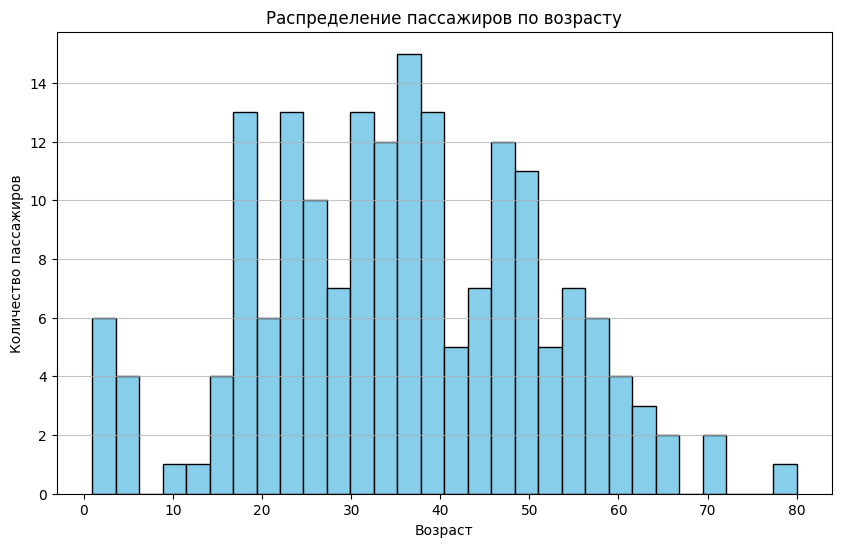

In [6]:
# Построение гистограммы распределения возраста
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение пассажиров по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [8]:
# Группируем данные по полу и вычисляем необходимые статистики
age_stats = df_cleaned.groupby('Sex')['Age'].agg(
    min_age='min',
    max_age='max',
    mean_age='mean',
    median_age='median',
    mode_age=lambda x: x.mode()[0]
).reset_index()

print(age_stats)

      Sex  min_age  max_age   mean_age  median_age  mode_age
0  female     2.00     63.0  32.676136       32.25      24.0
1    male     0.92     80.0  38.451789       37.00      36.0


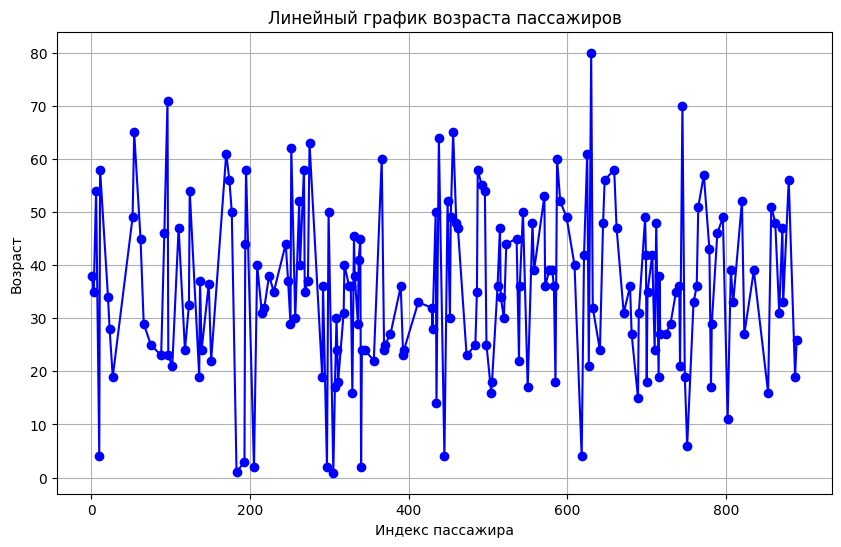

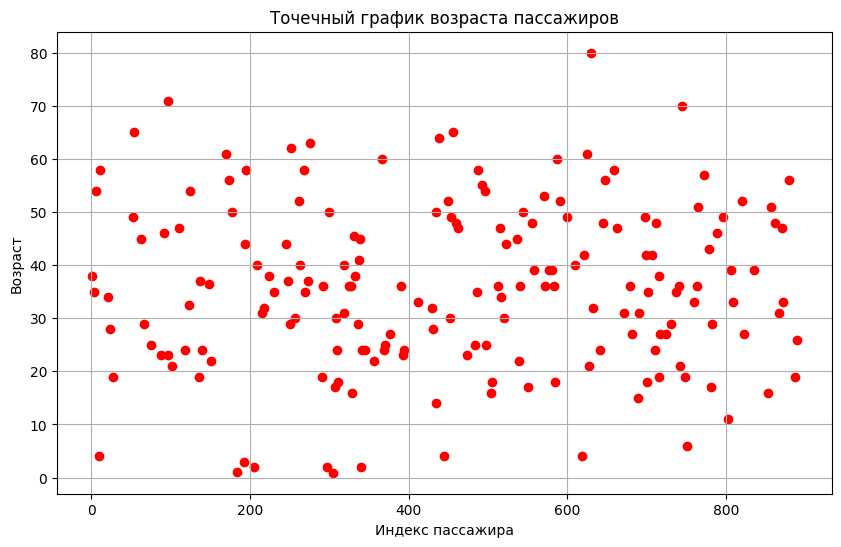

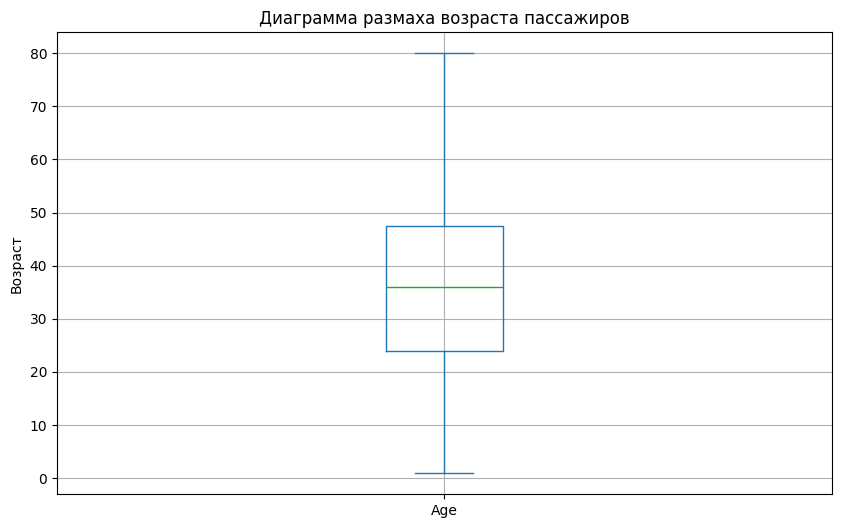

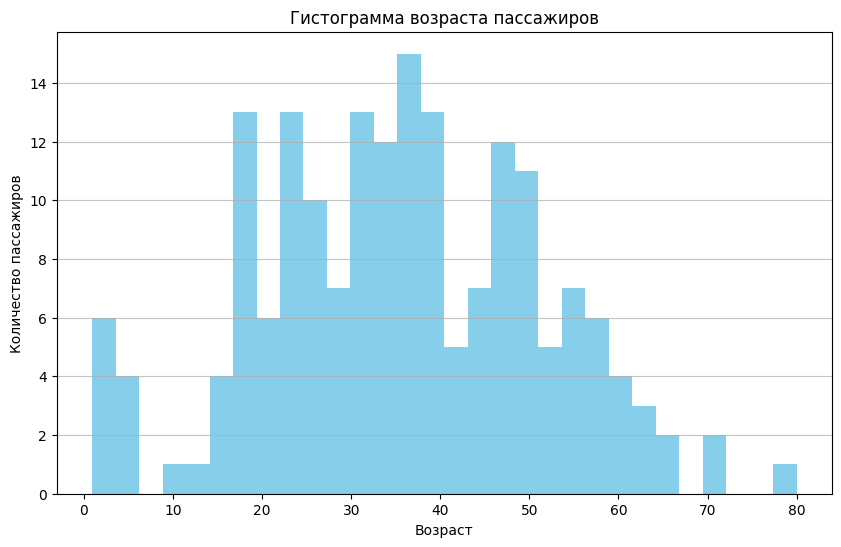

In [11]:
# Визуализация возраста с различными настройками

# 1. Линейный график
plt.figure(figsize=(10, 6))
df_cleaned['Age'].plot(kind='line', color='blue', linestyle='-', marker='o', title='Линейный график возраста пассажиров')
plt.xlabel('Индекс пассажира')
plt.ylabel('Возраст')
plt.grid()
plt.show()

# Параметры для визуализации
plt.figure(figsize=(10, 6))

# 2. Точечный график
plt.scatter(df_cleaned.index, df_cleaned['Age'], color='red')
plt.title('Точечный график возраста пассажиров')
plt.xlabel('Индекс пассажира')
plt.ylabel('Возраст')
plt.grid()
plt.show()

# 3. Диаграмма размаха
plt.figure(figsize=(10, 6))
df_cleaned['Age'].plot(kind='box', title='Диаграмма размаха возраста пассажиров')
plt.ylabel('Возраст')
plt.grid()
plt.show()

# 4. Гистограмма (для сравнения с предыдущим)
plt.figure(figsize=(10, 6))
df_cleaned['Age'].plot(kind='hist', bins=30, color='skyblue', title='Гистограмма возраста пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.grid(axis='y', alpha=0.75)
plt.show()